# **Grids**

## **0. Introduction**

In this note we review some basic concepts of numerical methods to solve partial differential equations.

Detailed description can be found in the `basics` folder.

### **0.1. Expected Outcomes**

By studying this note, you will :

- lorem ipsum

### **0.2. References**

This note draws heavily from the following sources:

- Ross L. Spencer and Michael Ware with John Colton. (2024). Partial Differential Equations: Python Edition. Computational Methods for Scientists. Department of Physics and Astronomy, Brigham Young University. 

We highly recommend checking them out if you are interested in learning more about this topic.

### **0.3. Working Environment**

The reader is expected to use either **jupyter notebook**, **jupyterlab** or any other editor that supports `.ipynb` file.

Python version used in this note is as follows.

In [1]:
import sys
print(sys.version)

3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]


In [7]:
import numpy as np
import matplotlib.pyplot as plt

## **1. Spatial Grids**

In this series of notes, we will solve partial differential equations, which usually mean that the desired solution is a function of both space $x$, which just sits, and time $t$, which flows.

When we solve problems like this we will be using **spatial grids**, to represent the $x$-part that doesn't flow.

The NumPy arrays are prefect for representing these kinds of spatial grids.

We'll encounter three basic types of spatial grids in this note.

[img]

Figure 1. shows a graphical representation of these three types of spatial grids for the region $0 \le x \le L$.

We divide this region into spatial **cells** (the spaces between vertical lines) and functions are evaluated at $N$ discrete **grid points**(the dots).

In a **cell-edge grid**, the grid points are located at the edge of the cell.

In a **cell-center grid**, the points are located in the middle of the cell.

Another useful grid is a **cell-center grid with ghost points**. 

The ghost points (unfilled dots) are extra grid points on either side of the interval of interest and are useful when we need to consider the derivatives at the edge of a grid.

Now let's write a Python program that creates a cell-edge spatial grid in the variable `x` as follows

In [3]:
N = 100     # number of grid points
lb = 0      # lower bound of the region
ub = np.pi  # upper bound of the region

x, h = np.linspace(lb, ub, N, retstep=True)

With the grid `x`, we can plot the function $y(x) = \sin(x)\sinh(x)$ on this grid.

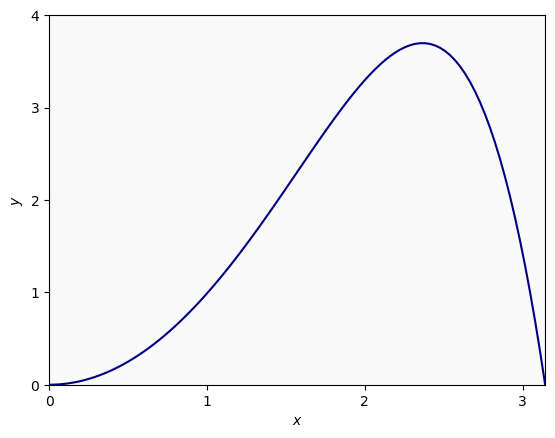

In [21]:
y = np.sin(x) * np.sinh(x)

# Plot the function y(x) on x.
fig, ax = plt.subplots()

ax.plot(x, y, color='navy')

ax.axis(xmin=0, xmax=np.pi, ymin=0)
ax.set_yticks(range(5))
ax.set_xticks(range(4))
ax.set_facecolor('#F9F9F9')
ax.set_ylabel(r'$y$')
ax.set_xlabel(r'$x$')

plt.show()

Note that (the number of grid points) = (the number of cells) + 1 in a cell-edge grid.

In a cell-center grid however, the number of grid points and the number of cells are identical.

Next we write some code using NumPy's `arange` function to create a cell-centered grid that has exactly 100 cells over the interval $0 \le x \le 2$.

In [40]:
N = 100               # number of grid points
lb = 0                # lower bound of the region
ub = 2                # upper bound of the region
h = (ub - lb) / N     # length of each cell
start = lb + 0.5 * h  # position of the first grid point
end = ub                

x = np.arange(start, end, h) # cell-center grid

Now evaluate the function $f(x) = \cos(x)$ on this grid and plot this function.

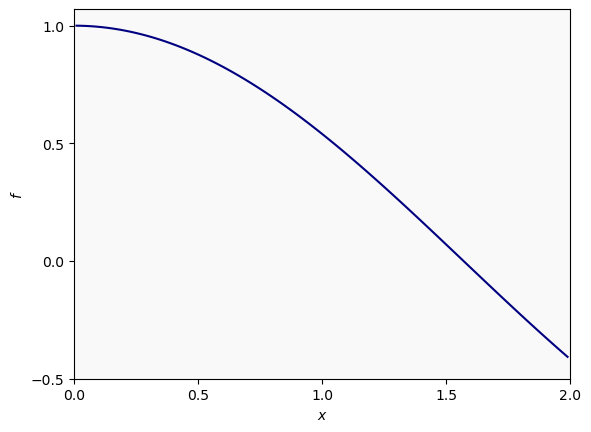

In [41]:
f = np.cos(x)

fig, ax = plt.subplots()

ax.plot(x, f, color='navy')

ax.axis(xmin=0, xmax=2, ymin=0)
ax.set_yticks(np.arange(-0.5, 1.1, 0.5))
ax.set_xticks(np.arange(0, 2.1, 0.5))
ax.set_facecolor('#F9F9F9')
ax.set_ylabel(r'$f$')
ax.set_xlabel(r'$x$')

plt.show()

We can estimate the area under the curve by summing the products of the centered function values $f_j$ with the widths of the cells $h$ like this (midpoint integration rule):

In [43]:
A = np.sum(f) * h

# Compare the result to the exact answer obtained by integration
err = np.abs(A - np.sin(2))
print(err)

1.5155133923694386e-05


As we compare the result to the analytical solution for the area

$$A = \int^2_0 \cos x dx = \sin(x) \bigg\rvert^2_0= \sin(2)$$

The error turned out to be approximately 1.516e-05, which is quite small.

Let's build a cell-center grid with ghost points over the inverval $0 \le x \le \pi/2$ with 500 cells (502 grid points), and evaluate the function $f(x) = \sin(x)$ on this grid.

In [46]:
N = 500
lb = 0
ub = np.pi/2
h = (ub - lb) / N
start = lb - h/2
end = ub + h

x = np.arange(start, end, h)
f = np.sin(x)

Now look carefully at the function values at the first two grid points and at the last two grid points.

The function $\sin(x)$ has the property that $f(0)=0$ and $f'(\pi/2)=0$.

The cell-center grid doesn't have points at the ends of the interval, so these boundary conditions on the function need to be enforced using more than one point.

In [60]:
print(f'The boundary values:       {lb:8f}, {ub:8f}')
print(f'The first two grid points: {x[0]:8.5f}, {x[1]:8.5f}')
print(f'The last two grid points:  {x[-2]:8.5f}, {x[-1]:8.5f}')

The boundary values:       0.000000, 1.570796
The first two grid points: -0.00157,  0.00157
The last two grid points:   1.56923,  1.57237


Using the ghost points in the grid we can approximate the values of the boundary condtions with either interpolation or extrapolation.

## **2. Interpolation and Extrapolation**